# Document Overview
### Create the customized EE scenarios based on the ResStock data
### Historial version:
#### Sep. 29, 2020

In [54]:
import difflib
import string
import pandas as pd
import copy
import math
import numpy as np
from numpy import median
import os
import datetime
from Manipulate import extract_datetime_8760
import matplotlib
import glob
import re
import matplotlib.pyplot as plt
from functools import reduce
import time
from heapq import nsmallest
import seaborn as sns
%matplotlib inline

In [55]:
def Aggregae_system_res_load(df_resstock,scalefactor,upgrade):
    print('Launch the upgrade='+str(upgrade))
    df_resstock_ug = df_resstock[df_resstock['upgrade']==upgrade]
    Building_Electricity_system_list = []
    for i in range(len(df_ScalingFactor)):
        ws = df_ScalingFactor.iloc[i]['epw']
        ut = df_ScalingFactor.iloc[i]['unit_type']
        scalefactor = df_ScalingFactor.iloc[i]['Scale_UsableRatio']*df_ScalingFactor.iloc[i]['Scale_BuildingTot_area']*df_ScalingFactor.iloc[i]['Scale_EIARefer']
        df_resstock_ug_ws = df_resstock_ug[df_resstock_ug['epw']==ws]
        df_resstock_ug_ws_bt = df_resstock_ug_ws[df_resstock_ug_ws['unit_type']==ut]
        df_resstock_ug_ws_bt_list = [x*scalefactor for x in df_resstock_ug_ws_bt['Building_Electricity'].tolist()]

        if i ==0:
            Building_Electricity_system_list = [x for x in df_resstock_ug_ws_bt_list]
        else:
            Building_Electricity_system_list = list(map(lambda x: x[0]+x[1],zip(Building_Electricity_system_list,df_resstock_ug_ws_bt_list)))

    df_system = pd.DataFrame()
    df_system['regional energy/kWh'] = Building_Electricity_system_list
    df_system['hour'] = df_label['hour']
    df_system['Date/Time'] = df_label['hour']
    return df_system

def customized_EE(df_system_0,df_system_1,df_system_2,df_system_3,df_system_4,df_system_5,k0=1,k1=0,k2=0,k3=0,k4=0,k5=0):
    df_system_combined = df_system_0.copy()
    df_system_combined['regional energy/kWh'] =list(map(lambda x: k0*x[0]+k1*x[1]+k2*x[2]+k3*x[3]+k4*x[4]+k5*x[5],zip(df_system_0['regional energy/kWh'].tolist(),df_system_1['regional energy/kWh'].tolist(),
                        df_system_2['regional energy/kWh'].tolist(),df_system_3['regional energy/kWh'].tolist(),df_system_4['regional energy/kWh'].tolist(),df_system_5['regional energy/kWh'].tolist())))
    return df_system_combined

In [ ]:
df_resstock = pd.read_csv('../Shared Drives/NREL_ResStock_0617/lbnl_geb_support_revamp4.csv')  

In [ ]:
start1 = datetime.datetime.now()

In [3]:
Region_list = ['CA','TX','NewEngland','MA']
region_id = 0 #0,1,2,3

In [14]:
df_label = pd.read_csv('Gross_load_' + Region_list[region_id]+'_scenario_0_VS_10.csv')

In [8]:
df_ScalingFactor=pd.read_csv('ScalingFactor(FullRun_ResStock_Data)_'+ Region_list[region_id] +'.csv')

In [30]:
df_system_0 = Aggregae_system_res_load(df_resstock,scalefactor,0)
df_system_1 = Aggregae_system_res_load(df_resstock,scalefactor,1)
df_system_2 = Aggregae_system_res_load(df_resstock,scalefactor,2)
df_system_3 = Aggregae_system_res_load(df_resstock,scalefactor,3)
df_system_4 = Aggregae_system_res_load(df_resstock,scalefactor,4)
df_system_5 = Aggregae_system_res_load(df_resstock,scalefactor,5)

Launch the upgrade=0
Launch the upgrade=1
Launch the upgrade=2
Launch the upgrade=3
Launch the upgrade=4
Launch the upgrade=5


In [69]:
df_system_combined_1 = customized_EE(df_system_0,df_system_1,df_system_2,df_system_3,df_system_4,df_system_5,k0=0.8,k1=0.2,k2=0,k3=0,k4=0,k5=0)
df_system_combined_2 = customized_EE(df_system_0,df_system_1,df_system_2,df_system_3,df_system_4,df_system_5,k0=0.2,k1=0.2,k2=0.2,k3=0.2,k4=0.2,k5=0)
df_system_combined_3 = customized_EE(df_system_0,df_system_1,df_system_2,df_system_3,df_system_4,df_system_5,k0=0.5,k1=0.1,k2=0.1,k3=0.1,k4=0.1,k5=0.1)
df_system_combined_4 = customized_EE(df_system_0,df_system_1,df_system_2,df_system_3,df_system_4,df_system_5,k0=0.1,k1=0.1,k2=0.1,k3=0.1,k4=0.1,k5=0.5)

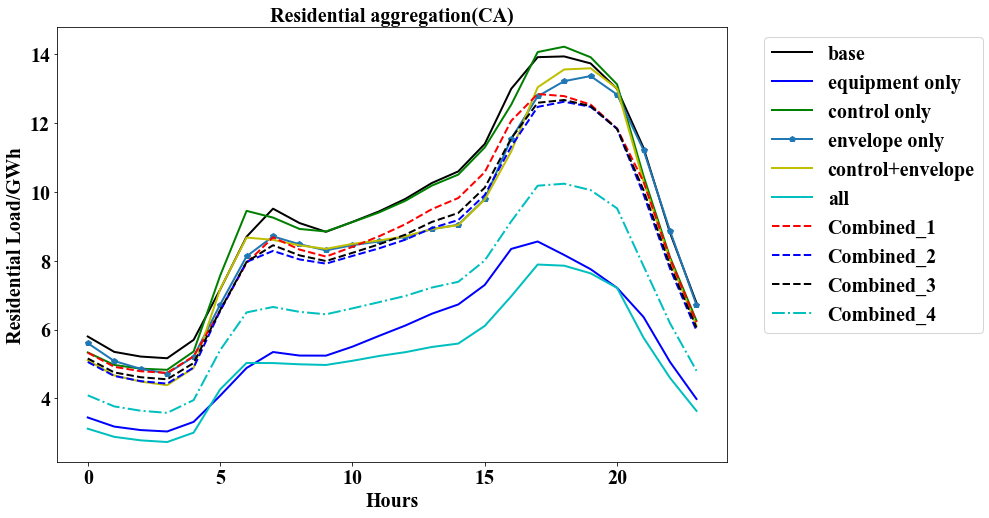

upgrade=0: 82573784285.66518
upgrade=1: 49124613408.86159
upgrade=2: 81380834620.51254
upgrade=3: 76802181061.89076
upgrade=4: 75805872257.06462
upgrade=5: 45092940837.00602
combined=1: 75883950110.30446
combined=2: 73137457126.79893
combined=3: 74107536361.36613


In [70]:
title_name = 'Residential aggregation('+Region_list[region_id]+ ')'
figsize = 12,8
figure, ax = plt.subplots(figsize=figsize)
hours= [x for x in range(0,24)]
kW_GW_multip = 0.000001

a,=plt.plot(hours,df_system_0.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-k',label='base',linewidth=2.0)
b,=plt.plot(hours,df_system_1.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-b',label='equipment only',linewidth=2.0)
c,=plt.plot(hours,df_system_2.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-g',label='control only',linewidth=2.0)
d,=plt.plot(hours,df_system_3.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-p',label='envelope only',linewidth=2.0)
e,=plt.plot(hours,df_system_4.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-y',label='control+envelope',linewidth=2.0)
f,=plt.plot(hours,df_system_5.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-c',label='all',linewidth=2.0)

A,=plt.plot(hours,df_system_combined_1.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'--r',label='Combined_1',linewidth=2.0)
B,=plt.plot(hours,df_system_combined_2.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'--b',label='Combined_2',linewidth=2.0)
C,=plt.plot(hours,df_system_combined_3.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'--k',label='Combined_3',linewidth=2.0)
D,=plt.plot(hours,df_system_combined_4.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-.c',label='Combined_4',linewidth=2.0)

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}

legend = plt.legend(handles=[a,b,c,d,e,f,A,B,C,D],prop=font1,bbox_to_anchor=[1.04,1])

plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

plt.xlabel('Hours',font2)
plt.ylabel('Residential Load/GWh',font2)
plt.title(title_name,font1) 
plt.show()

print('upgrade=0: ' + str(df_system_0['regional energy/kWh'].sum()))
print('upgrade=1: ' + str(df_system_1['regional energy/kWh'].sum()))
print('upgrade=2: ' + str(df_system_2['regional energy/kWh'].sum()))
print('upgrade=3: ' + str(df_system_3['regional energy/kWh'].sum()))
print('upgrade=4: ' + str(df_system_4['regional energy/kWh'].sum()))
print('upgrade=5: ' + str(df_system_5['regional energy/kWh'].sum()))
print('combined=1: ' + str(df_system_combined_1['regional energy/kWh'].sum()))
print('combined=2: ' + str(df_system_combined_2['regional energy/kWh'].sum()))
print('combined=3: ' + str(df_system_combined_3['regional energy/kWh'].sum()))

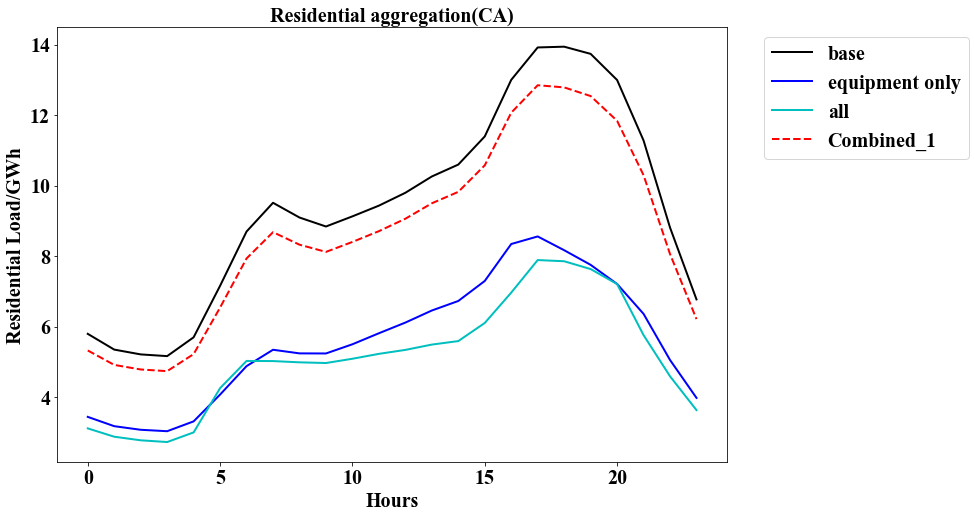

upgrade=0: 82573784285.66518
upgrade=1: 49124613408.86159
upgrade=2: 81380834620.51254
upgrade=3: 76802181061.89076
upgrade=4: 75805872257.06462
upgrade=5: 45092940837.00602
combined=1: 75883950110.30446
combined=2: 73137457126.79893
combined=3: 74107536361.36613


In [68]:
title_name = 'Residential aggregation('+Region_list[region_id]+ ')'
figsize = 12,8
figure, ax = plt.subplots(figsize=figsize)
hours= [x for x in range(0,24)]
kW_GW_multip = 0.000001

a,=plt.plot(hours,df_system_0.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-k',label='base',linewidth=2.0)
b,=plt.plot(hours,df_system_1.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-b',label='equipment only',linewidth=2.0)
# c,=plt.plot(hours,df_system_2.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-g',label='control only',linewidth=2.0)
# d,=plt.plot(hours,df_system_3.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-p',label='envelope only',linewidth=2.0)
# e,=plt.plot(hours,df_system_4.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-y',label='control+envelope',linewidth=2.0)
f,=plt.plot(hours,df_system_5.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-c',label='all',linewidth=2.0)

A,=plt.plot(hours,df_system_combined_1.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'--r',label='Combined_1',linewidth=2.0)
# B,=plt.plot(hours,df_system_combined_2.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'--b',label='Combined_2',linewidth=2.0)
# C,=plt.plot(hours,df_system_combined_3.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'--k',label='Combined_3',linewidth=2.0)
# D,=plt.plot(hours,df_system_combined_4.groupby('hour').mean()['regional energy/kWh']*kW_GW_multip,'-.c',label='Combined_4',linewidth=2.0)

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}

legend = plt.legend(handles=[a,b,f,A],prop=font1,bbox_to_anchor=[1.04,1])

plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

plt.xlabel('Hours',font2)
plt.ylabel('Residential Load/GWh',font2)
plt.title(title_name,font1) 
plt.show()

print('upgrade=0: ' + str(df_system_0['regional energy/kWh'].sum()))
print('upgrade=1: ' + str(df_system_1['regional energy/kWh'].sum()))
print('upgrade=2: ' + str(df_system_2['regional energy/kWh'].sum()))
print('upgrade=3: ' + str(df_system_3['regional energy/kWh'].sum()))
print('upgrade=4: ' + str(df_system_4['regional energy/kWh'].sum()))
print('upgrade=5: ' + str(df_system_5['regional energy/kWh'].sum()))
print('combined=1: ' + str(df_system_combined_1['regional energy/kWh'].sum()))
print('combined=2: ' + str(df_system_combined_2['regional energy/kWh'].sum()))
print('combined=3: ' + str(df_system_combined_3['regional energy/kWh'].sum()))